## Analysis on data after after experiments

Assume only single problem experiments!

In [ ]:
# TODO: we should probably for the experiments have a seperate folder for each! So right now we just have like database folder and logs folder and agent rewards folder but 
# we should have a folder for each experiment that contains all of these things.
# Same for the best solutions, we might want to have seperate folder for that? But actually for that we don't really care since we have the obj value in database and we are not collecting 
# the solutions or anything like that so it is fine I think.

# TODO: I might also maybe not use jupyter notebooks and just python scripts... lets see it is just annoying with the notebooks in git I think...

In [1]:
RESULTS_PATH = "results_final"

### Solution convergance

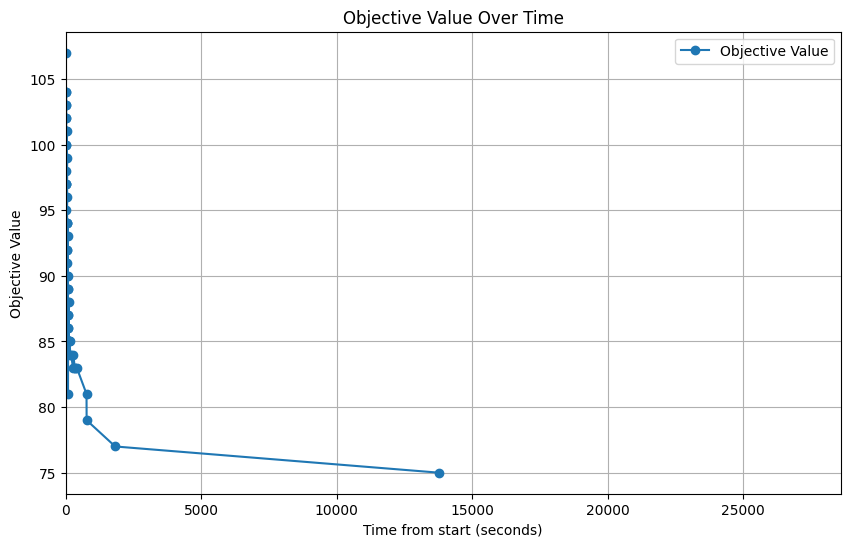

Statistics for `accepted` column:
{'True (Accepted)': np.int64(75), 'False (Rejected)': np.int64(87), 'Null (Not Validated/Error)': np.int64(0)}


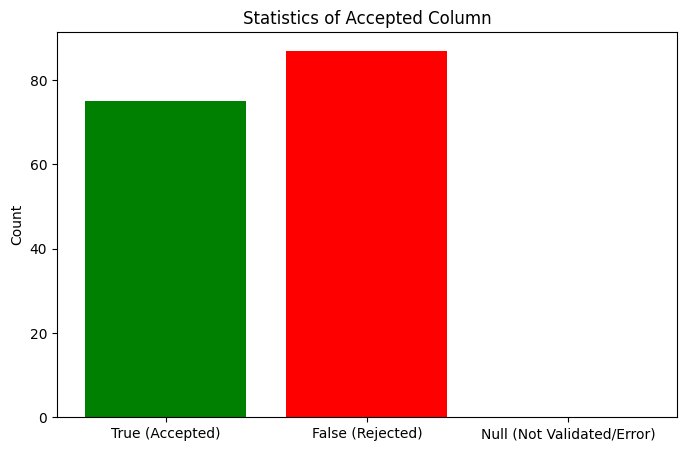

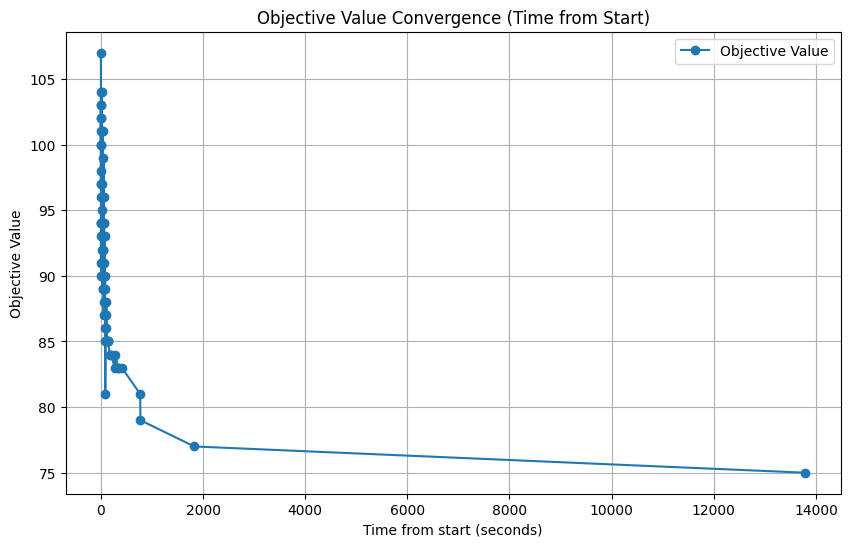

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## 

# Experiment
experiment = "results_test/experiment_2025-01-08_01-26-39"

# Parameters
DATABASE_PATH = os.path.join(experiment, "central_node.db")  # Path to your SQLite database
BEST_KNOWN_SOLUTION = 288	  # Replace with the best-known solution's objective value

# Connect to the database
conn = sqlite3.connect(DATABASE_PATH)

# Fetch data
query = """
SELECT 
    id,
    submission_time, 
    validation_end_time, 
    objective_value, 
    accepted 
FROM all_solutions
"""
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Ensure datetime columns are parsed correctly
df['submission_time'] = pd.to_datetime(df['submission_time'])
df['validation_end_time'] = pd.to_datetime(df['validation_end_time'])

# Filter only valid solutions (accepted = TRUE)
valid_solutions = df[df['accepted'] == 1]
#valid_solutions = df

# Sort by submission time
valid_solutions = valid_solutions.sort_values(by="submission_time")
#valid_solutions = valid_solutions.iloc[:-3]






## Convergance plot of objective value for accepted solutions (time from beginning to end of experiment)

# New column for time from start
experiment_total_time = 28600 # 2 hours
valid_solutions['time_from_start'] = (valid_solutions['submission_time'] - valid_solutions['submission_time'].iloc[0]).dt.total_seconds()

# Plot the time series of objective values
plt.figure(figsize=(10, 6))
plt.plot(valid_solutions['time_from_start'], valid_solutions['objective_value'], label="Objective Value", marker='o')
#plt.axhline(y=BEST_KNOWN_SOLUTION, color='r', linestyle='--', label="Best Known Solution")
plt.xlim(0, experiment_total_time)
plt.title("Objective Value Over Time")
plt.xlabel("Time from start (seconds)")
plt.ylabel("Objective Value")
plt.legend()
plt.grid()
plt.show()


## Bar plot for solution submission results (accepted/rejected/null)
accepted_stats = {
    'True (Accepted)': df['accepted'].sum() if df['accepted'].notna().sum() > 0 else 0,
    'False (Rejected)': (df['accepted'] == 0).sum(),
    'Null (Not Validated/Error)': df['accepted'].isna().sum(),
}

print("Statistics for `accepted` column:")
print(accepted_stats)

# Bar plot for statistics
labels = list(accepted_stats.keys())
values = list(accepted_stats.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'red', 'grey'])
plt.title("Statistics of Accepted Column")
plt.ylabel("Count")
plt.show()


## Convergance plot of objective value for accepted solutions (only time until last solution found)
valid_solutions['time_from_start'] = (valid_solutions['submission_time'] - valid_solutions['submission_time'].iloc[0]).dt.total_seconds()

plt.figure(figsize=(10, 6))
plt.plot(valid_solutions['time_from_start'], valid_solutions['objective_value'], label="Objective Value", marker='o')
#plt.axhline(y=BEST_KNOWN_SOLUTION, color='r', linestyle='--', label="Best Known Solution")
plt.title("Objective Value Convergence (Time from Start)")
plt.xlabel("Time from start (seconds)")
plt.ylabel("Objective Value")
plt.legend()
plt.grid()
plt.show()

In [46]:
valid_solutions

,id,submission_time,validation_end_time,objective_value,accepted,time_from_start
0,adcb2b2c-27ce-4bfa-909f-83ee664d2607,2025-01-06 15:02:47.397874,2025-01-06 15:07:47.397874,307.0,1,0.000000
1,07b3920b-3bf4-4ca3-86ed-2cfae84423e4,2025-01-06 15:03:02.129562,2025-01-06 15:08:02.129562,309.0,1,14.731688
2,f9090a96-cd4f-4874-ab0a-856eded58a84,2025-01-06 15:03:09.046697,2025-01-06 15:08:09.046697,311.0,1,21.648823
4,af034b2f-5dc1-41c1-8259-4d8cabdb6f7a,2025-01-06 15:03:15.704538,2025-01-06 15:08:15.704538,309.0,1,28.306664
5,c0c54faf-fa92-40d0-821c-07703be68cdb,2025-01-06 15:03:20.252093,2025-01-06 15:08:20.252093,312.0,1,32.854219
7,b44b19a9-3f5f-4619-9ba6-1207c822d3b0,2025-01-06 15:03:31.258947,2025-01-06 15:08:31.258947,293.0,1,43.861073
8,050f1627-ec66-40e8-b840-04e845a5137b,2025-01-06 15:03:31.452034,2025-01-06 15:08:31.452034,304.0,1,44.054160
14,87eb028f-288d-4dca-ad84-c5e65c5f80cd,2025-01-06 15:04:29.084913,2025-01-06 15:09:29.084913,295.0,1,101.687039
15,c525c049-5990-40d5-903e-7262b9df8dcc,2025-01-06 15:04:51.228727,2025-01-06 15:09:51.228727,300.0,1,123.830853
18,b84858c3-bde8-4102-bdda-7a9968db3768,2025-01-06 15:06:18.792968,2025-01-06 15:11:18.792968,295.0,1,211.395094


In [3]:
df

,id,submission_time,validation_end_time,objective_value,accepted
0,a0b4228a-904b-4860-86d1-d6bda58b3dc7,2025-01-04 16:54:20.277480,2025-01-04 16:59:20.277480,8292.0,1
1,f978c93d-c9e9-464d-a2b4-5ac51f46db1b,2025-01-04 16:54:20.353867,2025-01-04 16:59:20.353867,8236.0,1
2,fe60179b-3e0b-4841-8885-41ba4709453e,2025-01-04 16:54:23.225763,2025-01-04 16:59:23.225763,8440.0,0
3,7a210df7-12b5-4420-a015-044315e9b316,2025-01-04 16:54:23.401682,2025-01-04 16:59:23.401682,8274.0,1
4,d1c3f176-a158-41ee-bbbd-b0e843b63867,2025-01-04 16:54:23.820501,2025-01-04 16:59:23.820501,8423.0,0
...,...,...,...,...,...
212,96653c0b-45f7-456e-9b92-5aa58dd82b80,2025-01-04 17:23:00.571410,2025-01-04 17:28:00.571410,8106.0,1
213,da5ed304-f177-405d-89a8-ce799e851220,2025-01-04 17:24:25.288256,2025-01-04 17:29:25.288256,8069.0,1
214,82abe369-9666-46ee-8662-64754ff81492,2025-01-04 17:26:03.676374,2025-01-04 17:31:03.676374,8115.0,0
215,28a9015f-a64e-41ed-9ea3-424c27be3dd6,2025-01-04 17:28:16.756424,2025-01-04 17:33:16.756424,8109.0,0


In [27]:
df[pd.isna(df['accepted'])]

,id,submission_time,validation_end_time,objective_value,accepted
11,bf52fab8-37b2-49d1-a16e-c57f92f95e6d,2025-01-01 17:12:57.094018,2025-01-01 17:13:57.094018,NaN,NaN
26,68404e32-a8ca-458d-838b-24609b3d9e4c,2025-01-01 17:13:00.826489,2025-01-01 17:14:00.826489,NaN,NaN
41,cf5aa2b2-9cb0-49d5-9f58-dde759fcc7cd,2025-01-01 17:13:02.950387,2025-01-01 17:14:02.950387,NaN,NaN
43,22fd2184-b0ad-4db6-b2c9-90f4c9192c83,2025-01-01 17:13:03.301040,2025-01-01 17:14:03.301040,NaN,NaN
56,46be8d1a-4278-4533-bc4b-fa42c7ab0409,2025-01-01 17:13:04.643049,2025-01-01 17:14:04.643049,NaN,NaN
80,872d481c-6d52-43e1-89de-c0042c4d41c1,2025-01-01 17:13:07.808077,2025-01-01 17:14:07.808077,NaN,NaN
99,2cf08f67-f298-4aad-bc83-42255785c175,2025-01-01 17:13:10.144886,2025-01-01 17:14:10.144886,NaN,NaN
120,d556129a-544a-4e51-bab2-e8a14533ceb9,2025-01-01 17:13:13.053072,2025-01-01 17:14:13.053072,NaN,NaN
131,85d28e6d-3772-494c-91ef-8b31bc82d737,2025-01-01 17:13:14.495989,2025-01-01 17:14:14.495989,NaN,NaN
134,2bfbbc74-3099-4c8a-b9ef-61390368079f,2025-01-01 17:13:14.574725,2025-01-01 17:14:14.574725,NaN,NaN


In [22]:
valid_solutions.tail(20)

,id,submission_time,validation_end_time,objective_value,accepted
86,2fbed604-e422-4297-a7e0-5b8fc57e16ab,2025-01-01 23:15:49.462767,2025-01-01 23:20:49.462767,NaN,0.0
87,df123e01-52a9-4151-870e-5af30cd52ba8,2025-01-01 23:16:01.907653,2025-01-01 23:21:01.907653,NaN,0.0
88,da3f2a25-9090-48d7-addc-40672b22d0c0,2025-01-01 23:16:03.732750,2025-01-01 23:21:03.732750,NaN,0.0
89,bb750bd8-a278-40d8-a0e9-598d5f11202a,2025-01-01 23:16:13.794388,2025-01-01 23:21:13.794388,NaN,0.0
90,1d53c770-17ad-40ad-a578-e72f6093de5c,2025-01-01 23:16:19.763084,2025-01-01 23:21:19.763084,NaN,0.0
91,69af71fb-8b34-473a-b59c-e6cca0da3873,2025-01-01 23:16:19.930077,2025-01-01 23:21:19.930077,NaN,0.0
92,d30feb4b-6dd5-4c09-a1a0-50883d70544d,2025-01-01 23:16:21.242829,2025-01-01 23:21:21.242829,NaN,0.0
93,668219c5-00fb-4192-ba65-b4e43841ed06,2025-01-01 23:16:29.639471,2025-01-01 23:21:29.639471,NaN,0.0
94,4192b132-339d-4559-b4a8-107371d497e9,2025-01-01 23:16:34.997415,2025-01-01 23:21:34.997415,NaN,0.0
95,576c8227-85f9-4a5d-9c70-9aeec828bbd3,2025-01-01 23:17:13.840247,2025-01-01 23:22:13.840247,NaN,0.0


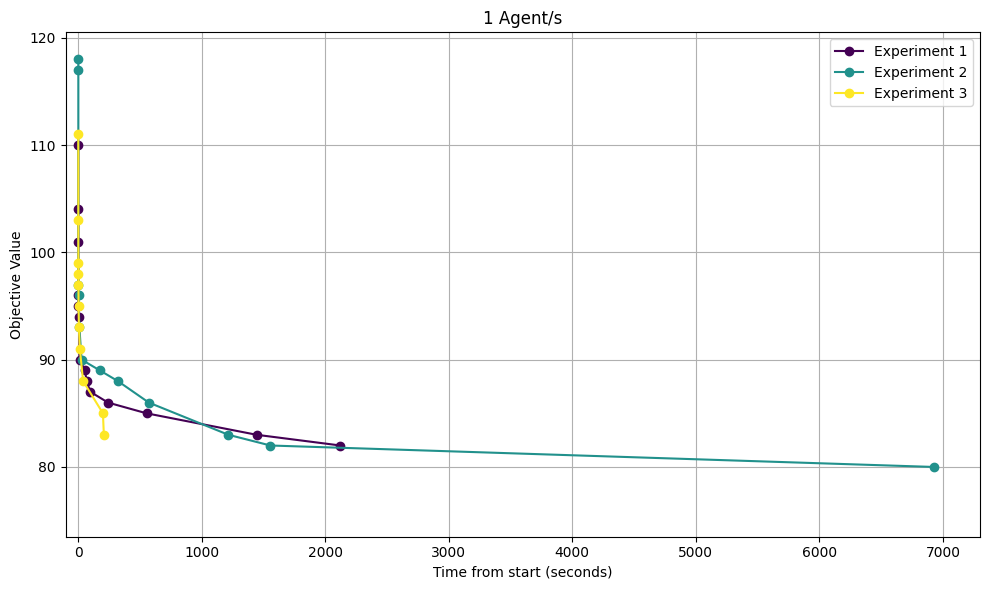

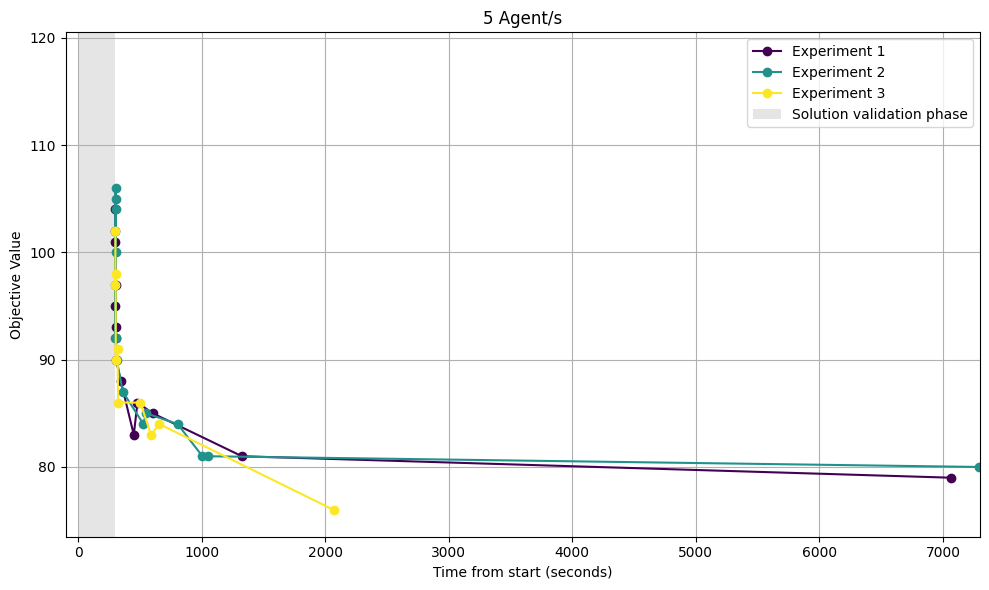

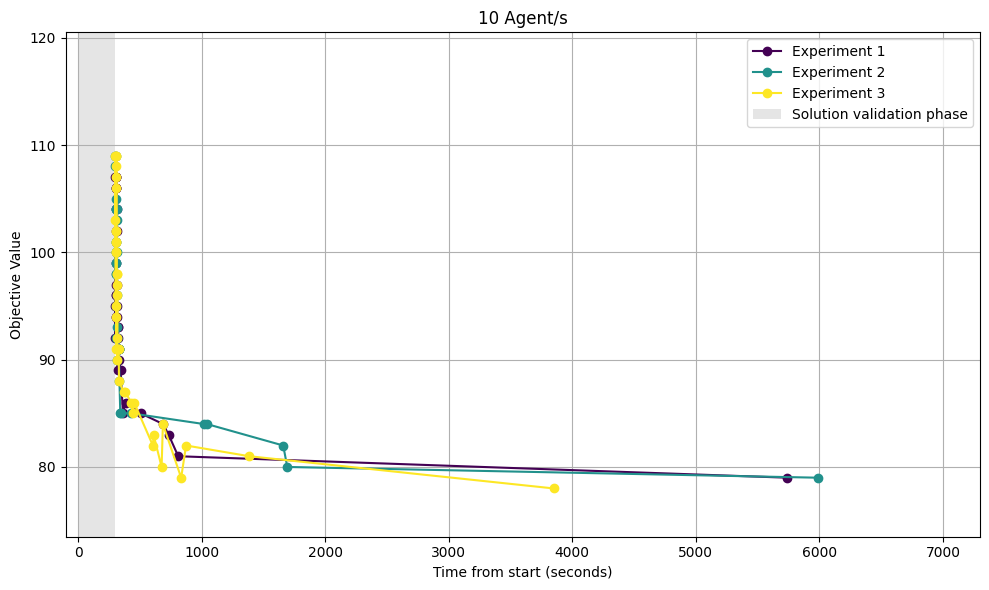

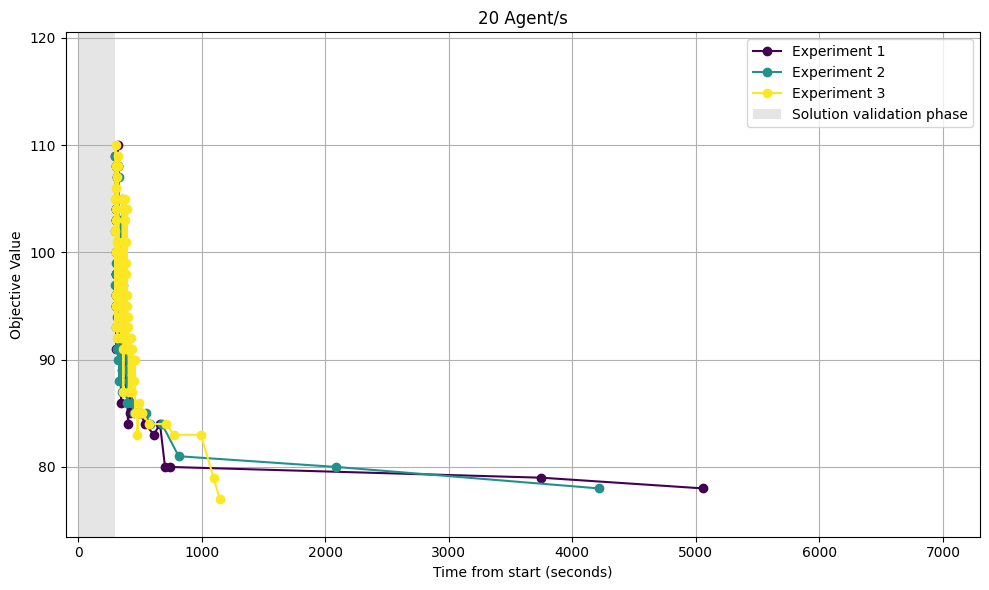

In [18]:
## Cleaner version of the convergance plot of objective value where we plot all experiments (for same number of agents) on the same plot ##

import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pathlib
import matplotlib
from dotenv import load_dotenv

import seaborn as sns
# Seaborn style
#sns.set_theme(style="whitegrid")
matplotlib.rc_file_defaults()
# Seaborn style with grid and ticks
# sns.set_theme(style="whitegrid")
# plt.rc('axes', grid=True)  # Ensure grid is on
# plt.rc('xtick', direction='in')  # Ticks inside
# plt.rc('ytick', direction='in')  # Ticks inside


problem_instance = "glass-sc_randomguess"

# Define the path to the main experiments directory
experiments_dir = f'results_final/{problem_instance}'
BEST_KNOWN_SOLUTION = 288  # Replace with the best-known solution's objective value
experiment_total_time = 7200 # 2 hours
load_dotenv(dotenv_path=f'{experiments_dir}/network.params')
sol_val_phase_duration = int(os.getenv('SOLUTION_VALIDATION_DURATION'))  # Example duration in seconds (read one of the from network.params file)


# Function to read start timestamp from the log file
def get_start_time(log_file_path):
    with open(log_file_path, 'r') as file:
        lines = file.readlines()
        # Extract the timestamp from the third line
        start_time_str = lines[2].split(' - ')[0].strip()
        start_time = datetime.strptime(start_time_str, '%Y-%m-%d %H:%M:%S,%f')
        return start_time
    
# Function to process and plot convergence for a single experiment
def process_experiment(db_path, start_time, num_agents):
    # Connect to the database
    conn = sqlite3.connect(db_path)

    # Fetch data
    query = """
    SELECT 
        id,
        submission_time, 
        validation_end_time, 
        objective_value, 
        accepted 
    FROM all_solutions
    """
    df = pd.read_sql_query(query, conn)

    # Close the database connection
    conn.close()

    # Ensure datetime columns are parsed correctly
    df['submission_time'] = pd.to_datetime(df['submission_time'])
    df['validation_end_time'] = pd.to_datetime(df['validation_end_time'])

    # Filter only valid solutions (accepted = TRUE)
    valid_solutions = df[df['accepted'] == 1]

    # Sort by submission time
    valid_solutions = valid_solutions.sort_values(by="validation_end_time")

    # Calculate time from start - if only single agent then there is no solution validation phase so we use submission time
    if num_agents == 1:
        valid_solutions['time_from_start'] = (valid_solutions['submission_time'] - start_time).dt.total_seconds()
    else:
        valid_solutions['time_from_start'] = (valid_solutions['validation_end_time'] - start_time).dt.total_seconds()

    return valid_solutions

# Initialize a dictionary to store data for each type of experiment
convergence_data = {}

# Iterate through all experiment folders
for experiment_folder in os.listdir(experiments_dir):
    folder_path = os.path.join(experiments_dir, experiment_folder)
    if os.path.isdir(folder_path):
        db_file_path = os.path.join(folder_path, "central_node.db")  # Adjust the database file name if different
        log_file_path = list(pathlib.Path(folder_path).glob('*.log'))[0]  # Log file with the timestamp
        if os.path.exists(db_file_path) and os.path.exists(log_file_path):
            # Get start time from the log file
            start_time = get_start_time(log_file_path)

            # Determine the number of agents in this experiment based on the number of lines in solve_iterations.csv
            df = pd.read_csv(os.path.join(folder_path, "solve_iterations.csv"), header=None)
            num_agents = len(df)

            # Initialize the list for this agent count type if not already done
            if num_agents not in convergence_data:
                convergence_data[num_agents] = []

            # Process the experiment and store the result
            convergence_data[num_agents].append(process_experiment(db_file_path, start_time, num_agents))

# Sort by the number of agents
convergence_data = dict(sorted(convergence_data.items()))


# Plot convergence for each type of experiment - 
# for num_agents, experiments in convergence_data.items():
#     fig, ax = plt.subplots(figsize=(10, 6))
    
#     for i, experiment_data in enumerate(experiments):
#         ax.plot(experiment_data['time_from_start'], experiment_data['objective_value'], 
#                  label=f"Experiment {i+1}", marker='o')

#     #plt.margins(x=0.1)
#     #plt.axhline(y=BEST_KNOWN_SOLUTION, color='r', linestyle='--', label="Best Known Solution")
#     ax.set_xlim(left=0)

#     # # Lower the z-order of the entire axis (ticks, labels, and grid)
#     # ax.spines['left'].set_zorder(2)
#     # ax.spines['bottom'].set_zorder(2)
#     # ax.xaxis.set_zorder(1)  # Lower the z-order of the x-axis elements
#     # ax.yaxis.set_zorder(1)  # Lower the z-order of the y-axis elements
#     # ax.grid(zorder=0)  # Ensure the grid is at the lowest layer
        
#     # Annotate solution validation phase - if only single agent then there is no solution validation phase
#     # Add a transparent horizontal box for the solution validation phase
#     if num_agents != 1:
#         min_start_time = min(exp['time_from_start'].iloc[0] for exp in experiments)
#         ax.axhspan(ymin=plt.ylim()[0], ymax=plt.ylim()[1], 
#                     xmin=min_start_time / plt.xlim()[1], 
#                     xmax=(min_start_time - sol_val_phase_duration) / plt.xlim()[1], 
#                     facecolor='gray', alpha=0.2, label="Solution Validation Phase Length")
        
#     # Now adjust the limits with padding
#     # current_xlim = plt.gca().get_xlim()
#     # left_padding = current_xlim[0] - 0.1 * (current_xlim[1] - current_xlim[0])
#     # plt.xlim(left=left_padding, right=current_xlim[1])

#     #ax.margins(0.05)
        
#     ax.set_title(f"Objective Value Convergence for {num_agents} Agents")
#     ax.set_xlabel("Time from start (seconds)")
#     ax.set_ylabel("Objective Value")
#     ax.legend()
#     ax.grid()
#     plt.show()

# Find y-axis limits for all experiments
all_objective_values = [exp['objective_value'].values for experiments in convergence_data.values() for exp in experiments]
min_obj_value = min([min(obj_values) for obj_values in all_objective_values])
max_obj_value = max([max(obj_values) for obj_values in all_objective_values])

# Plot convergence for each type of experiment - show end time as well for better visualization of the time scale
for num_agents, experiments in convergence_data.items():
    plt.figure(figsize=(10, 6))

    colors = plt.cm.viridis(np.linspace(0, 1, len(experiments)))  # Use a colormap for consistent color
    
    for i, (experiment_data, color) in enumerate(zip(experiments, colors)):
        plt.plot(experiment_data['time_from_start'], experiment_data['objective_value'], 
                 label=f"Experiment {i+1}", marker='o', color=color)
        
    #plt.axhline(y=BEST_KNOWN_SOLUTION, color='r', linestyle='--', label="Best Known Solution")
    plt.xlim(-100, experiment_total_time+100)  # Set custom x-
    plt.ylim(min_obj_value - 2.5, max_obj_value + 2.5)  # Set custom y-axis limits


        
    # Annotate solution validation phase - if only single agent then there is no solution validation phase
    # Add a transparent horizontal box for the solution validation phase
    if num_agents != 1:
        # min_start_time = min(exp['time_from_start'].iloc[0] for exp in experiments)
        # # Normalize positions using the full x-axis range
        # normalized_xmin = 0 / experiment_total_time  # Always starts at 0
        # normalized_xmax = min_start_time / experiment_total_time
        # #plt.xlim(0, experiment_total_time)
        # plt.axhspan(ymin=plt.ylim()[0], ymax=plt.ylim()[1], 
        #             xmin=min_start_time / plt.xlim()[1], 
        #             xmax=(min_start_time - sol_val_phase_duration) / plt.xlim()[1], 
        #             facecolor='gray', alpha=0.2, label="Solution Validation Phase Length")
        #plt.xlim(0, experiment_total_time)
        

        # Calculate the absolute positions of the box
        min_start_time = min(exp['time_from_start'].iloc[0] for exp in experiments)
        left_hand_side = min_start_time - sol_val_phase_duration  # Left-hand side of the box
        right_hand_side = min_start_time  # Right-hand side of the box

        # Normalize these positions based on the current x-axis limits
        lower_xlim, upper_xlim = plt.xlim()
        normalized_xmin = (left_hand_side - lower_xlim) / (upper_xlim - lower_xlim)
        normalized_xmax = (right_hand_side - lower_xlim) / (upper_xlim - lower_xlim)

        # Add the horizontal span
        plt.axhspan(
            ymin=plt.ylim()[0], 
            ymax=plt.ylim()[1], 
            xmin=normalized_xmin, 
            xmax=normalized_xmax, 
            facecolor='gray', alpha=0.2, label="Solution validation phase"
        )
 
    
    plt.title(f"{num_agents} Agent/s")
    plt.xlabel("Time from start (seconds)")
    plt.ylabel("Objective Value")
    plt.legend()
    plt.grid()
    plt.tight_layout()  # Adjust the layout for better spacing
    #plt.savefig(f"img/convergence_plot_{problem_instance}_{num_agents}_agents.pdf")
    plt.show()


In [32]:
dict(sorted(convergence_data.items())).keys()

dict_keys([1, 5, 10, 20])

In [ ]:
convergence_data

In [28]:
import os
import sqlite3
import pandas as pd

problem_instance = "reblock354"

# Define the path to experiments directory
experiments_dir = f'results_final/{problem_instance}'
BEST_KNOWN_SOLUTION = -39280521.2281657  # Replace with the actual best-known solution

# Initialize a list to store results
results = []

# Loop through each experiment folder
for experiment_folder in os.listdir(experiments_dir):
    experiment_path = os.path.join(experiments_dir, experiment_folder)
    
    if os.path.isdir(experiment_path):
    
        # Path to the database
        database_path = os.path.join(experiment_path, "central_node.db")
        
        # Connect to the database
        conn = sqlite3.connect(database_path)
        
        # Fetch the number of agents from the agent_nodes table
        num_agents_query = "SELECT COUNT(*) AS num_agents FROM agent_nodes"
        num_agents = pd.read_sql_query(num_agents_query, conn)['num_agents'].iloc[0]
        
        # Fetch the best objective value
        best_objective_query = """
        SELECT 
            objective_value
        FROM all_solutions
        WHERE
            id = 
            (
                SELECT 
                    solution_id
                FROM best_solutions
            )
        """
        best_objective = pd.read_sql_query(best_objective_query, conn)['objective_value'].iloc[0]
        
        conn.close()
        
        # Append the result for this experiment
        results.append({
            "Number of Agents": num_agents,
            "Best Objective Value": best_objective
        })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Group by number of agents to calculate averages
summary_df = results_df.groupby("Number of Agents").agg({
    "Best Objective Value": "mean"
}).reset_index().rename(columns={
    "Best Objective Value": "Average Best Objective Value",
})

# Add the number of experiments for each type of experiment (1 agent, 5 agents, 10, etc.) - sanity check
summary_df['Number of Experiments'] = results_df.groupby("Number of Agents").size().reset_index(name='Number of Experiments')['Number of Experiments']

# Calculate the deviation from the best-known solution
summary_df["Deviation from Best Known Objective (%)"] = np.abs( (BEST_KNOWN_SOLUTION - summary_df["Average Best Objective Value"]) / BEST_KNOWN_SOLUTION ) * 100

# Display the summary DataFrame
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(summary_df)


   Number of Agents  Average Best Objective Value  Number of Experiments  \
0                 1                 -19648583.231                      3   
1                 5                 -20294770.595                      3   
2                10                 -20820066.789                      3   
3                20                 -20356357.246                      3   

   Deviation from Best Known Objective (%)  
0                                   49.979  
1                                   48.334  
2                                   46.996  
3                                   48.177  


In [27]:
results_df

,Number of Agents,Best Objective Value
0,10,-2.088658e+07
1,20,-2.055826e+07
2,1,-1.925212e+07
3,10,-2.073441e+07
4,20,-2.013657e+07
5,20,-2.037424e+07
6,5,-2.038364e+07
7,1,-2.016704e+07
8,5,-2.051488e+07
9,1,-1.952659e+07


In [ ]:
## Time to get to best solution (only for supportcase16)

# OR somehow measure the speed of convergence - TODO: not sure how to do this yet??

### 20 random problem instances

In [2]:
import os
import sqlite3
import pandas as pd
import numpy as np

problem_instance = "neos-953928"
print("Problem instance:", problem_instance)
problem_instance_path_20agents = f'results_final/20_random_problems_2hours_20agents_guess/{problem_instance}_20agents_guess'
problem_instance_path_1agent = f'results_final/20_random_problems_2hours_1agent_guess/{problem_instance}_1agent_guess'
BEST_KNOWN_SOLUTION = -99.904
print("Best known solution:", BEST_KNOWN_SOLUTION)

# Path to the database
print("1 agent")
database_path = os.path.join(problem_instance_path_1agent, "central_node.db")

# Connect to the database
conn = sqlite3.connect(database_path)

# Best objective value
best_objective_query = """
        SELECT 
            objective_value
        FROM all_solutions
        WHERE
            id = 
            (
                SELECT 
                    solution_id
                FROM best_solutions
            )
        """
best_objective_df = pd.read_sql_query(best_objective_query, conn)
if best_objective_df.empty:
    print("Best objective value: Not found")
else:
    best_objective_value_1agent = best_objective_df['objective_value'].iloc[0]
    print("Best objective value:", best_objective_value_1agent)
    print("Deviation from best known solution:", np.abs( (BEST_KNOWN_SOLUTION - best_objective_value_1agent) / BEST_KNOWN_SOLUTION ) * 100, "%")

# All solutions
query = """
SELECT
    id,
    submission_time,
    objective_value,
    accepted
FROM all_solutions
"""
all_solutions_df = pd.read_sql_query(query, conn).sort_values(by="objective_value")
all_solutions_df.dropna(subset=['objective_value'], inplace=True)
all_solutions_df = all_solutions_df[all_solutions_df['accepted'] == 1]
if all_solutions_df.empty:
    print("No solutions found")
else:
    worst_objective_value = all_solutions_df['objective_value'].iloc[-1]
    print("Worst objective value:", worst_objective_value)
    #print("Improvement from worst to best:", np.abs( (worst_objective_value - best_objective_value_1agent) / worst_objective_value) * 100, "%")
    print("Improvement from worst to best:", ( np.abs(worst_objective_value - best_objective_value_1agent) / min(np.abs(worst_objective_value),np.abs(best_objective_value_1agent)) )* 100, "%")

# Close the connection
conn.close()

# Total solve iterations
solve_iterations_path = os.path.join(problem_instance_path_1agent, "solve_iterations.csv")
solve_iterations_df = pd.read_csv(solve_iterations_path, header=None)
total_solve_iterations = solve_iterations_df.iloc[:,1].sum()
print("Total solve iterations:", total_solve_iterations)

# Path to the database
print("20 agents")
database_path = os.path.join(problem_instance_path_20agents, "central_node.db")

# Connect to the database
conn = sqlite3.connect(database_path)

# Best objective value
best_objective_query = """
        SELECT 
            objective_value
        FROM all_solutions
        WHERE
            id = 
            (
                SELECT 
                    solution_id
                FROM best_solutions
            )
        """
best_objective_df = pd.read_sql_query(best_objective_query, conn)
if best_objective_df.empty:
    print("Best objective value: Not found")
else:
    best_objective_value_20agents = best_objective_df['objective_value'].iloc[0]
    print("Best objective value:", best_objective_value_20agents)
    print("Deviation from best known solution:", np.abs( (BEST_KNOWN_SOLUTION - best_objective_value_20agents) / BEST_KNOWN_SOLUTION ) * 100, "%")

# All solutions
query = """
SELECT
    id,
    submission_time,
    objective_value,
    accepted
FROM all_solutions
"""
all_solutions_df = pd.read_sql_query(query, conn).sort_values(by="objective_value")
all_solutions_df.dropna(subset=['objective_value'], inplace=True)
all_solutions_df = all_solutions_df[all_solutions_df['accepted'] == 1]
if all_solutions_df.empty:
    print("No solutions found")
else:
    worst_objective_value = all_solutions_df['objective_value'].iloc[-1]
    print("Worst objective value:", worst_objective_value)
    #print("Improvement from worst to best:", np.abs( (worst_objective_value - best_objective_value_20agents) / worst_objective_value) * 100, "%")
    print("Improvement from worst to best:", ( np.abs(worst_objective_value - best_objective_value_20agents) / min(np.abs(worst_objective_value),np.abs(best_objective_value_20agents)) )* 100, "%")


# Close the connection
conn.close()

# Total solve iterations
solve_iterations_path = os.path.join(problem_instance_path_20agents, "solve_iterations.csv")
solve_iterations_df = pd.read_csv(solve_iterations_path, header=None)
total_solve_iterations = solve_iterations_df.iloc[:,1].sum()
print("Total solve iterations:", total_solve_iterations)

# Differnce between 1 agent and 20 agents
if not best_objective_df.empty:
    if best_objective_value_20agents <= best_objective_value_1agent:
        #print("Improvement using 20 agents from 1 agent:", np.abs( (best_objective_value_20agents - best_objective_value_1agent) / best_objective_value_1agent )* 100, "%")
        print("Improvement using 20 agents from 1 agent:", ( np.abs(best_objective_value_20agents - best_objective_value_1agent) / min(np.abs(best_objective_value_20agents),np.abs(best_objective_value_1agent)) )* 100, "%")
    else:
        print("NO IMPROVEMENT using 20 agents from 1 agent")
        #print("Improvement using 1 agent from 20 agents:", np.abs( (best_objective_value_1agent - best_objective_value_20agents) / best_objective_value_20agents )* 100, "%")
        print("Improvement using 1 agent from 20 agents:", ( np.abs(best_objective_value_1agent - best_objective_value_20agents) / min(np.abs(best_objective_value_20agents),np.abs(best_objective_value_1agent)) )* 100, "%")

Problem instance: neos-953928
Best known solution: -99.904
1 agent
Best objective value: Not found
No solutions found
Total solve iterations: 653196
20 agents
Best objective value: Not found
No solutions found
Total solve iterations: 12858541


In [12]:
solve_iterations_df.iloc[:,1].sum()

np.int64(3104247)

In [15]:
if best_objective.empty:
    print("No best objective found!")

No best objective found!


In [6]:
os.path.exists(database_path)

True

In [3]:
best_objective

NameError: name 'best_objective' is not defined

In [6]:
all_solutions_df[all_solutions_df['accepted'] == 1]

,id,submission_time,objective_value,accepted
103,ea88ad28-0967-42b2-8a25-a9e6469cfb87,2025-01-13 09:48:22.691671,-2.421288e+09,1
113,fe8eb3f7-6c4b-4fea-a732-8555f0c300da,2025-01-13 09:53:08.611528,-1.868550e+09,0
120,4feaf6f7-2327-43fa-be81-8f116da0fad3,2025-01-13 09:55:13.959320,-1.821270e+09,0
81,ad986305-0c5e-41f5-a777-c9449f6b215d,2025-01-13 09:46:44.448105,-1.771744e+09,1
94,b6b085aa-8b14-4862-9ae7-6f66c64f4ff7,2025-01-13 09:47:34.453540,-1.768020e+09,1
...,...,...,...,...
10,6cba498c-2372-4062-84d7-12eaacf4dd9a,2025-01-13 09:44:30.842403,-5.696998e+08,0
3,9dace385-f1e2-470a-b6cb-0ea3aeba4ad5,2025-01-13 09:44:24.448410,-4.682123e+08,0
37,30d680c8-6e20-4e87-9235-c97506164f95,2025-01-13 09:45:09.165025,-4.332034e+08,0
13,5290ddcf-c2d8-40e6-b7e1-680bdd87ec74,2025-01-13 09:44:33.742849,-4.127103e+08,0


In [8]:
all_solutions_df.sort_values(by="submission_time")

,id,submission_time,objective_value,accepted
0,dad8aac1-3cf9-4ed5-98a9-a08a41b60bec,2025-01-13 09:44:21.948745,-1.304631e+09,1
1,1582af98-0dc3-4343-9a90-f9aca98237ff,2025-01-13 09:44:22.593254,-6.489615e+08,0
2,3f88bcb4-a88e-49a1-ab59-f387fdeacc9a,2025-01-13 09:44:23.121149,-8.435612e+08,1
3,9dace385-f1e2-470a-b6cb-0ea3aeba4ad5,2025-01-13 09:44:24.448410,-4.682123e+08,0
4,7543451c-1819-4090-a42c-cf3a8fd22d90,2025-01-13 09:44:25.641532,-6.993350e+08,0
...,...,...,...,...
117,08769822-26ef-4188-9dbd-fb0d736ea63f,2025-01-13 09:54:16.732233,-1.581851e+09,0
118,0f52626e-c2d2-47a5-ba9d-b5c308be1c8d,2025-01-13 09:55:03.402864,-1.663965e+09,0
119,8a7d8795-b6a7-414b-a2df-7273adf65264,2025-01-13 09:55:11.029563,-1.722443e+09,0
120,4feaf6f7-2327-43fa-be81-8f116da0fad3,2025-01-13 09:55:13.959320,-1.821270e+09,0


### Solution iterations scale-up

   #agents  sol_iterations    speedup
3        1    5.942103e+05   1.000000
0        5    3.031392e+06   5.101547
1       10    5.998908e+06  10.095597
2       20    1.173323e+07  19.745921


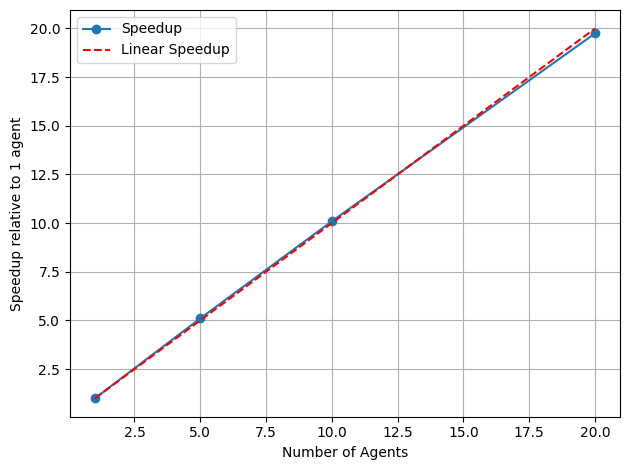

In [14]:
## See how the scalability of the solution iterations is with increasing number of agents

import os
import pandas as pd
import numpy as np

## Calculate and plot how the number of solution iterations scales with the number of agents

problem_instance = "glass-sc_randomguess"

# Define the path to the main experiments directory
experiments_dir = f'results_final/{problem_instance}'

# Initialize a dictionary to store data for each agent count
results = {}

# Iterate through all experiment folders
for experiment_folder in os.listdir(experiments_dir):
    folder_path = os.path.join(experiments_dir, experiment_folder)
    if os.path.isdir(folder_path):
        csv_file_path = os.path.join(folder_path, 'solve_iterations.csv')
        if os.path.exists(csv_file_path):
            # Read the CSV file
            df = pd.read_csv(csv_file_path, header=None)
            num_agents = len(df)

            # Compute the sum for this single experiment
            avg_iterations = df[1].sum()

            # Accumulate data for each number of agents
            if num_agents not in results:
                results[num_agents] = []
            results[num_agents].append(avg_iterations)

# Prepare final results for plotting
final_results = []
for num_agents, iterations_list in results.items():
    avg_iterations_over_experiments = np.mean(iterations_list)
    final_results.append({'#agents': num_agents, 'sol_iterations': avg_iterations_over_experiments})

# Convert to DataFrame
final_df = pd.DataFrame(final_results).sort_values(by='#agents')

# Speed up relative to 1 agent
single_agent_iterations = final_df.loc[final_df['#agents'] == 1, 'sol_iterations'].values[0]
final_df['speedup'] = final_df['sol_iterations'] / single_agent_iterations

# Print the final DataFrame
print(final_df)

# Plotting (optional)
import matplotlib.pyplot as plt

plt.plot(final_df['#agents'], final_df['speedup'], marker='o', label='Speedup')
agents_range = np.linspace(final_df['#agents'].min(), final_df['#agents'].max(), 100)
plt.plot(agents_range, agents_range, linestyle='--', color='red', label='Linear Speedup')
plt.xlabel('Number of Agents')
plt.ylabel('Speedup relative to 1 agent')
#plt.title(f'Scalability of Solution Iterations with Increasing \n Number of Agents ({problem_instance})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{problem_instance}_scalability.png')
plt.show()

## There is an asterisk with this result. Not all agents will have the same time to solve, could be up to max_solve_time more time for some agents. 
## So just note that, but either way it is quite obvious that the solution iterations scale linearly with the number of agents.
## Also note that even though when there are > 1 agents on the platform, the agents also need to validate solutions, which does take time from 
## the total solve time. However, on the long run, the validation time is < 0.1% of the total solve time so it is negligible.
### -> I fixed it for reblock354 and glass-sc but not supportcase16!!!

In [11]:
single_agent_iterations

np.float64(5432363.0)

In [22]:
final_results

[{'#agents': 1, 'sol_iterations': np.float64(5523192.0)},
 {'#agents': 5, 'sol_iterations': np.float64(29458768.666666668)},
 {'#agents': 10, 'sol_iterations': np.float64(58176904.333333336)}]

In [23]:
results

{1: [np.int64(5429608), np.int64(5432363), np.int64(5707605)],
 5: [np.int64(29173984), np.int64(29776124), np.int64(29426198)],
 10: [np.int64(57039744), np.int64(58762249), np.int64(58728720)]}

### Rewards

In [ ]:
## 

Total rewards for all agents on average:
1454.6666666666667


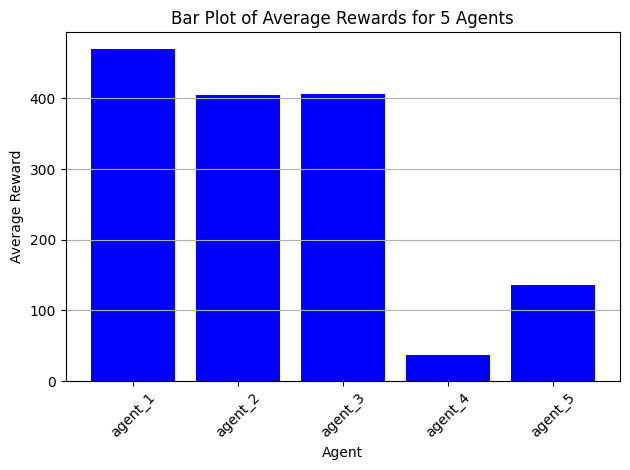

Total rewards for all agents on average:
4712.333333333333


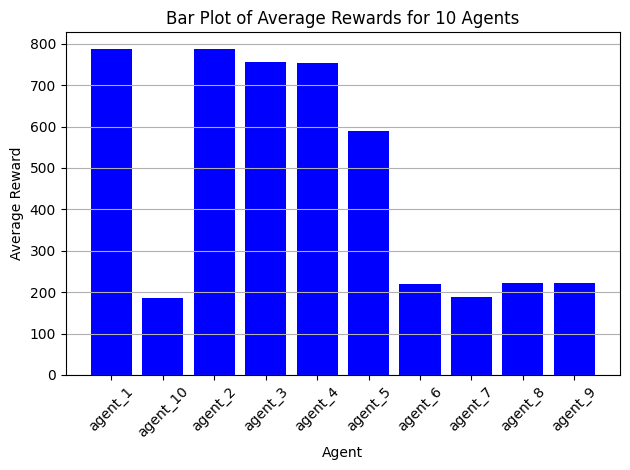

Total rewards for all agents on average:
10249.0


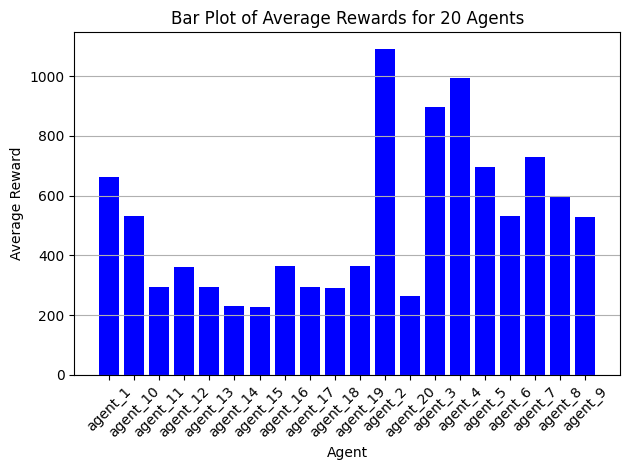

Total rewards for all agents on average:
1233.3333333333333


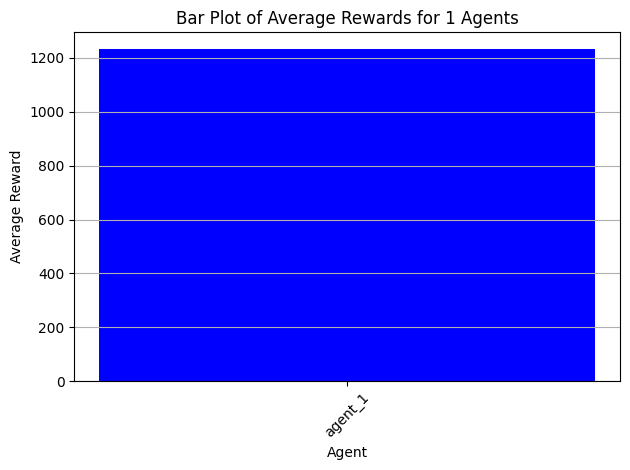

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

problem_instance = "glass-sc_randomguess"

# Define the path to the main experiments directory
experiments_dir = f'results_final/{problem_instance}'

# Initialize a dictionary to store rewards for each agent count type
rewards_data = {}

# Iterate through all experiment folders
for experiment_folder in os.listdir(experiments_dir):
    folder_path = os.path.join(experiments_dir, experiment_folder)
    if os.path.isdir(folder_path):
        csv_file_path = os.path.join(folder_path, 'rewards.csv')  # Adjust the file name if different
        if os.path.exists(csv_file_path):
            # Read the CSV file
            df = pd.read_csv(csv_file_path, header=None)
            df.columns = ['agent', 'case', 'reward']
            
            # Determine the number of agents in this experiment (unique agents)
            num_agents = len(df['agent'].unique())

            # Initialize the list for this agent count type if not already done
            if num_agents not in rewards_data:
                rewards_data[num_agents] = {}

            # Group by agent and compute the average reward
            avg_rewards = df.groupby('agent')['reward'].mean()
            for agent, avg_reward in avg_rewards.items():
                if agent not in rewards_data[num_agents]:
                    rewards_data[num_agents][agent] = []
                rewards_data[num_agents][agent].append(avg_reward)

# Compute overall average for each agent and plot
for num_agents, agents_rewards in rewards_data.items():
    avg_rewards_per_agent = {agent: sum(rewards)/len(rewards) for agent, rewards in agents_rewards.items()}
    #total_rewards = sum(avg_rewards_per_agent.values())

    sum(avg_rewards_per_agent.values())

    print("Total rewards for all agents on average:")
    print(sum(avg_rewards_per_agent.values()))
    
    plt.figure()
    plt.bar(avg_rewards_per_agent.keys(), avg_rewards_per_agent.values(), color='blue')
    plt.xlabel('Agent')
    plt.ylabel('Average Reward')
    plt.title(f'Bar Plot of Average Rewards for {num_agents} Agents')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


In [30]:
rewards_data

{1: {'agent_1': [600.0, 300.0, 600.0]},
 5: {'agent_1': [109.0, 213.0, 12.0],
  'agent_2': [10.0, 210.0, 12.0],
  'agent_3': [112.0, 113.0, 112.0],
  'agent_4': [7.0, 111.0, 10.0],
  'agent_5': [11.0, 11.0, 8.0]},
 10: {'agent_1': [227.0, 119.0, 23.0],
  'agent_10': [227.0, 21.0, 25.0],
  'agent_2': [226.0, 21.0, 20.0],
  'agent_3': [128.0, 117.0, 26.0],
  'agent_4': [28.0, 122.0, 116.0],
  'agent_5': [27.0, 320.0, 10.0],
  'agent_6': [224.0, 21.0, 121.0],
  'agent_7': [326.0, 122.0, 25.0],
  'agent_8': [26.0, 21.0, 120.0],
  'agent_9': [120.0, 13.0, 26.0]}}

In [36]:
avg_rewards_per_agent

{'agent_1': 500.0}

In [ ]:
# We can also look at e.g. the all_solutions table to get some information. For example, we can look how much reward each solution submission 
# is getting on average. Also we can see how much reward for accepted vs declined and more...